# 실습참여 파일 제출안내
- Task : 아이캠퍼스에서 실습용 파일 다운 받아서, 빈칸 채우기
- 파일명: lab01-학번.ipynb
- 아이캠퍼스에 제출
- 기한: 오늘만 자정까지 (00:00), 다음주부터는 수업시간 끝날 때까지 (19:15)

# Overview: Lab 01
1. 그래프 라이브러리 소개
 - 1-1. Networdx
 - 1-2. pytorch geometric
 - 1-3. dgl (실습에서 사용할 예정!)

2. 그래프 정의 및 시각화
 - 그래프 구축 및 시각화


#### 1. 그래프 라이브러리 소개
  - 1-1. Networkx
    - 홈페이지 : https://networkx.org/documentation/latest/tutorial.html
    - 특징 : 시각화


In [ ]:
# Install networkx 
# colab에는 이미 내장되어 있어서 따로 설치 필요 X
! pip install networkx

In [1]:
# Import networkx
import networkx as nx

# creating a graph
G = nx.Graph()

# add nodes & attributes
G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"})])

# add edges
G.add_edges_from([(1, 2), (1, 3)])

In [2]:
print("== # of nodes: ", G.number_of_nodes())
print("== # of edges: ", G.number_of_edges())
print(G)
print("== Node IDs", list(G.nodes))

== # of nodes:  3
== # of edges:  2
Graph with 3 nodes and 2 edges
== Node IDs [1, 2, 3]


  - 1-2. pytorch geometric
    - 홈페이지 : https://pytorch-geometric.readthedocs.io/en/latest/
    - 특징 : 다양한 GNN모델 제공, 예제 제공

In [3]:
# python & pytorch version check first
from platform import python_version
import torch

print("== Python has version {}".format(python_version()))
print("== PyTorch has version {}".format(torch.__version__))

== Python has version 3.7.13
== PyTorch has version 1.12.1+cu113


In [4]:
# Install torch geometric
# -q : quiet
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.12.0+cu113.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.12.0+cu113.html
!pip install -q torch-geometric

     |████████████████████████████████| 7.9 MB 7.7 MB/s 
     |████████████████████████████████| 3.5 MB 8.3 MB/s 
     |████████████████████████████████| 467 kB 8.5 MB/s 


In [5]:
# import torch geometric
from torch_geometric.data import Data

# creating a graph
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [6]:
print("== # of nodes: ", data.num_nodes)
print("== # of edges: ", data.num_edges)
print(data)

== # of nodes:  3
== # of edges:  4
Data(x=[3, 1], edge_index=[2, 4])


  - 1-3. dgl
    - 홈페이지: https://docs.dgl.ai/en/latest/install/index.html 
    - 특징 : 다양한 GNN모델 제공,  Tensorflow나 Apache MXNet 지원, 한국어 intro 제공
    - Tensor : [PyTorch로 시작하는 딥 러닝 입문  > 02. 텐서 조작하기(Tensor Manipulation) 1 ](https://wikidocs.net/52460)

In [7]:
# install dgl
# https://www.dgl.ai/pages/start.html

!pip install -q dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html

     |████████████████████████████████| 235.1 MB 47 kB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 281 kB 14.2 MB/s 
     |████████████████████████████████| 51 kB 500 kB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
     |████████████████████████████████| 109 kB 76.0 MB/s 
     |████████████████████████████████| 103 kB 64.6 MB/s 
     |████████████████████████████████| 36.8 MB 44 kB/s 
     |████████████████████████████████| 41 kB 415 kB/s 
     |████████████████████████████████| 3.2 MB 54.6 MB/s 
     |████████████████████████████████| 546 kB 69.1 MB/s 
     |████████████████████████████████| 90 kB 10.6 MB/s 
     |████████████████████████████████| 121 kB 78.2 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 100 kB 13.3 MB/s 


In [8]:
# import dgl

import dgl

Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


#### 2. 그래프 정의 및 시각화
> 그래프 구축
  
  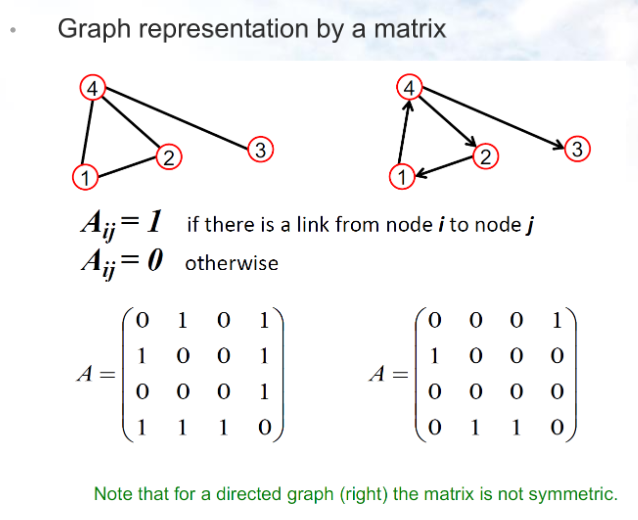

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})
== Node IDs:  tensor([0, 1, 2, 3])
== Edge IDs:  (tensor([0, 1, 3, 3]), tensor([3, 0, 1, 2]))


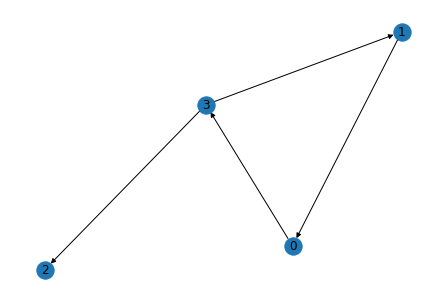

In [20]:
# 그래프 만들기 1 
"""
dgl.graph(data, ntype=None, etype=None, *, num_nodes=None, idtype=None, device=None, row_sorted=False, col_sorted=False, **deprecated_kwargs)
"""

u, v = torch.tensor([0, 1, 3, 3]), torch.tensor([3, 0, 1, 2])
g = dgl.graph((u, v))

# number of nodes are inferred from the max node IDs in the given edges
print(g) 

# Node IDs
print("== Node IDs: ", g.nodes())

# Edge IDs
print("== Edge IDs: ",g.edges())

# visualization
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

== Adjacency matrix: 
 tensor([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 0]])
== adj to edge list: 
 tensor([[0, 1, 3, 3],
        [3, 0, 1, 2]])
Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})
== Node IDs:  tensor([0, 1, 2, 3])
== Edge IDs:  (tensor([0, 1, 3, 3]), tensor([3, 0, 1, 2]))
== # of in_degrees:  4
== # of out_degrees:  4


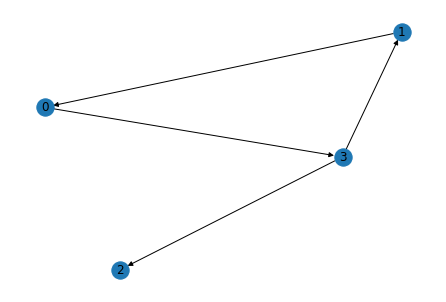

In [12]:
# 그래프 만들기 2 from adjacency matrix

adj = torch.tensor([[0, 0, 0, 1],[1,0,0,0],[0,0,0,0],[0, 1,1,0]])
print("== Adjacency matrix: \n", adj)

adj_t = torch.nonzero(adj).T
print("== adj to edge list: \n", adj_t)

# creating a graph
u,v = adj_t[0], adj_t[1]
g = dgl.graph((u, v))

print(g) 

# Node IDs
print("== Node IDs: ", g.nodes())

# Edge IDs
print("== Edge IDs: ",g.edges())

# #of degrees 
print("== # of in_degrees: ", len(g.in_degrees())) 
print("== # of out_degrees: ", len(g.out_degrees()))

# visualization
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

> undirected, directed

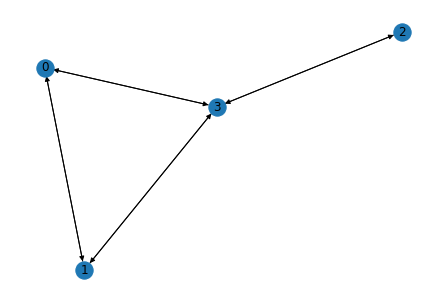

In [21]:
# build undirected graph
## g : directed graph

# undirected graph 만들기 1 
bg1 = dgl.to_bidirected(g)
nx_G = dgl.to_networkx(bg1)
nx.draw(nx_G, with_labels=True)

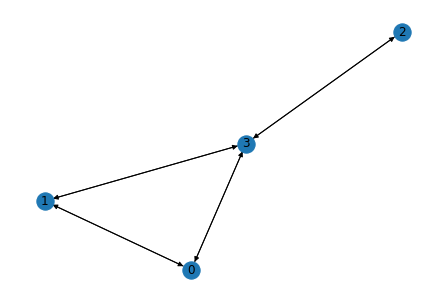

In [22]:
# undirected graph 만들기 2 

bg2 = dgl.add_reverse_edges(g, copy_ndata=True, copy_edata=True, ignore_bipartite=True)
nx_G = dgl.to_networkx(bg2)
nx.draw(nx_G, with_labels=True)

> complete graph

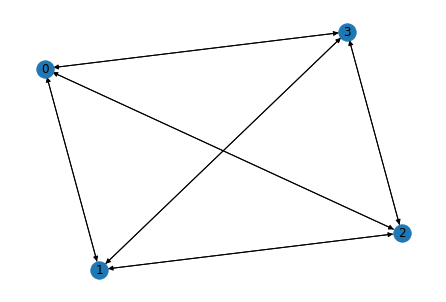

In [25]:
# If the node with the largest ID is isolated (meaning no edges),
# then one needs to explicitly set the number of nodes
import torch as th

u, v = torch.tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]), torch.tensor([1,2,3,0,2,3,0,1,3,0,1,2])
g_complete = dgl.graph((u, v))
nx_complete = dgl.to_networkx(g_complete)
nx.draw(nx_complete, with_labels=True)

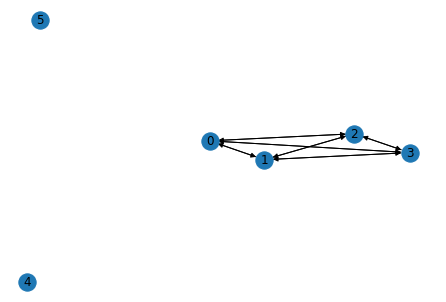

In [26]:
g_no_edges = dgl.graph((u, v), num_nodes=6)
nx_no_edges = dgl.to_networkx(g_no_edges)
nx.draw(nx_no_edges, with_labels=True)

> bipartite graph : 노드 타입이 2개

> heterogeneous graph : 노드 타입이 2개 이상
- https://docs.dgl.ai/guide_ko/graph-heterogeneous.html

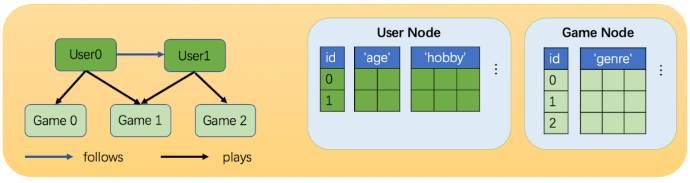

In [27]:
# Create a heterograph with 3 node types and 3 edges types.
"""
dgl.heterograph(data_dict, num_nodes_dict=None, idtype=None, device=None)
"""

graph_data = {
   ('drug', 'interacts', 'gene'): (torch.tensor([0,0, 1,1,1, 2]), torch.tensor([1,2, 0,2,3, 2]))
}

g = dgl.heterograph(graph_data)
print(g)
print("== Node types: ",g.ntypes)
print("== Edge types: ",g.etypes)
print("== Typical edge types  : ",g.canonical_etypes)

Graph(num_nodes={'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'gene'): 6},
      metagraph=[('drug', 'gene', 'interacts')])
== Node types:  ['drug', 'gene']
== Edge types:  ['interacts']
== Typical edge types  :  [('drug', 'interacts', 'gene')]


In [28]:
# dgl.heterograph() 에서 노드,엣지 타입 다루기
print("== 'drug' 노드 개수: ",g.num_nodes('drug'))
print("== 'drug' 노드 IDs: ",g.nodes('drug'))
print("== 'gene' 노드 IDs: ",g.nodes('gene'))

== 'drug' 노드 개수:  3
== 'drug' 노드 IDs:  tensor([0, 1, 2])
== 'gene' 노드 IDs:  tensor([0, 1, 2, 3])


In [29]:
# Node type name must be specified if there are more than one node types.
g.nodes()

DGLError: ignored

== Node types:  ['drug', 'gene']
== Node type of each node:  tensor([0, 0, 0, 1, 1, 1, 1])
== # of nodes:  7


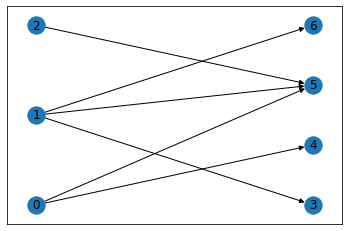

In [30]:
# visualization
# heterogeneous 타입은 to_networkx()가 지원이 안되어서 조작이 필요함.
# 다음에 large graph 시각화 배울 예정!

g_hete2homo = dgl.to_homogeneous(g)

print("== Node types: " ,g.ntypes)
print("== Node type of each node: ", g_hete2homo.ndata[dgl.NTYPE])
print("== # of nodes: ", g_hete2homo.num_nodes())

nx_hete2homo = dgl.to_networkx(g_hete2homo)
nx.draw_networkx(
    nx_hete2homo,
    pos = nx.drawing.layout.bipartite_layout(nx_hete2homo, [0,1,2]))

In [ ]:
# [참고] A homogeneous graph : 모든 노트 타입이 동일

u, v = torch.tensor([0, 0,1, 1, 1, 2, 2, 3, 3, 3]), torch.tensor([1,2,0,3,0,1,3,0,1,4])
g_homo = dgl.heterograph({('node_type', 'edge_type', 'node_type'): (u, v)})
g_hete = dgl.heterograph({('source_type', 'edge_type', 'dest_type'): (u, v)})

> node & edge attribute 
- https://docs.dgl.ai/guide_ko/graph-feature.html

In [ ]:
g = dgl.graph(([0, 0, 1, 5], [1, 2, 2, 0])) # 6 nodes, 4 edges
print(g)

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [ ]:
g.ndata['x_n'] = th.ones(g.num_nodes(), 3)               # 6 node feature of length 3 => torch.Size([6, 3])
g.edata['x_e'] = th.ones(g.num_edges(), dtype=th.int32)  # 4 edges, scalar integer feature [1,1,1,1]
print(g)
print("== Node attribute x_n and size: \n" ,g.ndata['x_n'],g.ndata['x_n'].size() )
print("== Edge attribute x_e: \n" ,g.edata['x_e'])

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x_n': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'x_e': Scheme(shape=(), dtype=torch.int32)})
== Node attribute x_n and size: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) torch.Size([6, 3])
== Edge attribute x_e: 
 tensor([1, 1, 1, 1], dtype=torch.int32)


In [ ]:
# different names can have different shapes
g.ndata['y'] = th.randn(g.num_nodes(), 5)
print(g)

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x_n': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x_e': Scheme(shape=(), dtype=torch.int32)})


> unweighted/weighted

In [ ]:
edges = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
weights = th.tensor([0.1, 0.6, 0.9, 0.7])  # weight of each edge
g = dgl.graph(edges)
g.edata['w'] = weights  # give it a name 'w'
print(g)
print("== Edge weight w: \n" ,g.edata['w'])

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)})
== Edge weight w: 
 tensor([0.1000, 0.6000, 0.9000, 0.7000])


> self-edges (self-loops) / multi-graph

Graph(num_nodes=3, num_edges=3,
      ndata_schemes={'hv': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'he': Scheme(shape=(1,), dtype=torch.float32)})
== Edge attribute he bf self-loops: 
 tensor([[0.],
        [1.],
        [2.]])


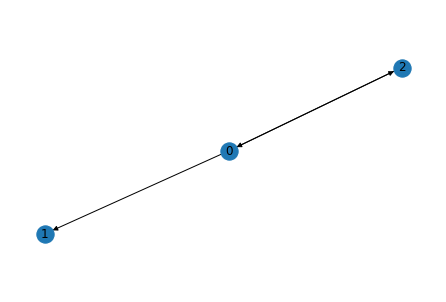

In [ ]:
# homogeneous graph

g = dgl.graph((torch.tensor([0, 0, 2]), torch.tensor([2, 1, 0])))
g.ndata['hv'] = torch.arange(3).float().reshape(-1, 1)
g.edata['he'] = torch.arange(3).float().reshape(-1, 1)
print(g)
print("== Edge attribute he bf self-loops: \n" ,g.edata['he'])

nx_g = dgl.to_networkx(g)
nx.draw(nx_g, with_labels=True)

Graph(num_nodes=3, num_edges=6,
      ndata_schemes={'hv': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'he': Scheme(shape=(1,), dtype=torch.float32)})
== Edge attribute he af self-loops: 
 tensor([[0.],
        [1.],
        [2.],
        [0.],
        [0.],
        [0.]])


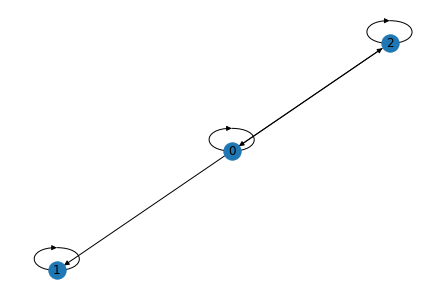

In [ ]:
g_loop = dgl.add_self_loop(g)
print(g_loop)
print("== Edge attribute he af self-loops: \n", g_loop.edata['he'])

nx_loop = dgl.to_networkx(g_loop)
nx.draw(nx_loop, with_labels=True)

In [ ]:
# heterogeneous graph

g = dgl.heterograph({
    ('user', 'follows', 'user'): (torch.tensor([1, 2]),
                                  torch.tensor([0, 1])),
    ('user', 'plays', 'game'): (torch.tensor([0, 1]),
                                torch.tensor([0, 1]))})

print("== hetero-graph bf self-loops: \n", g)
print()

g = dgl.add_self_loop(g, etype='follows')
print("== hetero-graph af self-loops of 'follows' edges: \n", g)

== hetero-graph bf self-loops: 
 Graph(num_nodes={'game': 2, 'user': 3},
      num_edges={('user', 'follows', 'user'): 2, ('user', 'plays', 'game'): 2},
      metagraph=[('user', 'user', 'follows'), ('user', 'game', 'plays')])

== hetero-graph af self-loops of 'follows' edges: 
 Graph(num_nodes={'game': 2, 'user': 3},
      num_edges={('user', 'follows', 'user'): 5, ('user', 'plays', 'game'): 2},
      metagraph=[('user', 'user', 'follows'), ('user', 'game', 'plays')])


In [ ]:
# self-loops는 source와 target node가 모두 자기 자신!
# so, source node와 target node가 동일할 때만 사용 가능

g = dgl.add_self_loop(g, etype='plays')
print("== hetero-graph af self-loops of 'plays' edges: \n", g)

DGLError: ignored

# 실습

- adj matrix 이용하여 dgl 그래프 정의
- self-loop
- degree 구하기
- 시각화

** 출력화면과 동일하게 나올 수 있도록 할 것!

== Adjacency matrix: 
 tensor([[0, 1, 0, 1, 0],
        [1, 0, 0, 1, 1],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 0, 0],
        [1, 1, 0, 0, 0]])
== adj to edge list: 
 tensor([[0, 0, 1, 1, 1, 2, 3, 3, 4, 4],
        [1, 3, 0, 3, 4, 3, 1, 2, 0, 1]])
Graph(num_nodes=5, num_edges=10,
      ndata_schemes={}
      edata_schemes={})
== # of in_degrees:  5
== # of out_degrees:  5


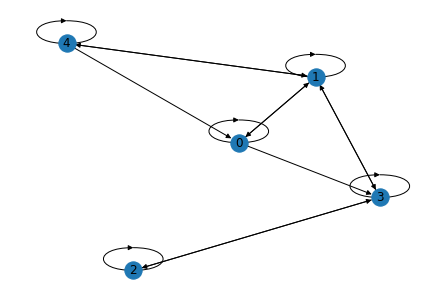

In [35]:
# create a graph from adjacency matrix

adj = torch.tensor([[0, 1, 0, 1,0],[1,0,0,1,1],[0,0,0,1,0],[0, 1,1,0,0],[1, 1,0,0,0]])
print("== Adjacency matrix: \n", adj)

adj_t = torch.nonzero(adj).T
print("== adj to edge list: \n", adj_t)

# creating a graph
u,v = adj_t[0], adj_t[1]
g = dgl.graph((u, v))

print(g) 

# self-loops
g_loop = dgl.add_self_loop(g)

# #of degrees 
print("== # of in_degrees: ", len(g.in_degrees()))  
print("== # of out_degrees: ", len(g.out_degrees())) 

# visualization
nx_G = dgl.to_networkx(g_loop)
nx.draw(nx_G, with_labels=True)

# Next Lab

- date: 2022.09.20.
- contents (subject to change):
  - Benchmark dataset
  - Visualization for large graphs
  - Random Graph
  - etc.